In [13]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('seaborn')

import warnings
warnings.filterwarnings("ignore")

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.utils import class_weight

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [16]:
from tensorflow import keras
from tensorflow.keras import layers

from tensorflow.keras.utils import to_categorical

In [17]:
url = ('https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data')

df1 = pd.read_csv(url,header=None)
df1.columns = ['classes', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 
               'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
               'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color',
               'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']

df1.head()

,classes,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [18]:
df1.tail()

,classes,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l
8123,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,o,c,l


In [19]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   classes                   8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [20]:
df1.describe()

,classes,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [21]:
df2=pd.get_dummies(df1)

In [22]:
df2.head()

,classes_e,classes_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [23]:
df2.shape

(8124, 119)

In [24]:
df3=df2.sample(frac=1, random_state=100)

for i in range(9):
    df3=df3.sample(frac=1, random_state=100)

In [25]:
df3.head()

,classes_e,classes_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
5009,0,1,0,0,0,0,0,1,0,0,...,0,0,1,1,0,0,0,0,0,0
7829,1,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
2593,1,0,0,0,1,0,0,0,1,0,...,0,1,0,1,0,0,0,0,0,0
3000,1,0,0,0,0,0,0,1,0,0,...,0,1,0,1,0,0,0,0,0,0
102,1,0,0,0,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0


In [26]:
N = len(df1)
N1 = int(4 * N / 6)
N2 = int(5 * N / 6)

In [27]:
x_train = df3.iloc[:N1, 2:]

In [28]:
x_train.describe()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
count,5416.000000,5416.000000,5416.000000,5416.000000,5416.000000,5416.000000,5416.000000,5416.000000,5416.000000,5416.000000,...,5416.000000,5416.000000,5416.000000,5416.000000,5416.000000,5416.000000,5416.000000,5416.000000,5416.000000,5416.000000
mean,0.056684,0.000185,0.388663,0.098966,0.004062,0.451440,0.283604,0.000185,0.310377,0.405835,...,0.151219,0.499815,0.213811,0.388294,0.261632,0.108198,0.033973,0.140879,0.043759,0.023264
std,0.231259,0.013588,0.487492,0.298644,0.063610,0.497682,0.450789,0.013588,0.462691,0.491098,...,0.358295,0.500046,0.410033,0.487407,0.439564,0.310659,0.181177,0.347929,0.204578,0.150756
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,...,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [29]:
x_train.shape

(5416, 117)

In [30]:
x_val = df3.iloc[N1:N2, 2:]
x_val.describe()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
count,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000,...,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000
mean,0.055391,0.001477,0.381832,0.111521,0.005908,0.443870,0.284343,0.001477,0.326440,0.387740,...,0.149188,0.482275,0.208272,0.384786,0.272526,0.089365,0.042097,0.134417,0.050960,0.025849
std,0.228827,0.038419,0.486015,0.314893,0.076667,0.497023,0.451267,0.038419,0.469084,0.487415,...,0.356405,0.499870,0.406222,0.486724,0.445423,0.285375,0.200886,0.341225,0.219998,0.158744
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,...,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [31]:
x_val.shape

(1354, 117)

In [32]:
x_test = df3.iloc[N2:, 2:]
x_test.describe()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
count,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000,...,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000
mean,0.051699,0.000739,0.391433,0.104136,0.001477,0.450517,0.294682,0.000739,0.319793,0.384786,...,0.167651,0.502216,0.200886,0.387001,0.267356,0.092319,0.037666,0.146972,0.045790,0.022895
std,0.221500,0.027176,0.488251,0.305550,0.038419,0.497729,0.456068,0.027176,0.466569,0.486724,...,0.373694,0.500180,0.400811,0.487244,0.442743,0.289583,0.190458,0.354209,0.209107,0.149624
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,...,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [33]:
x_test.shape

(1354, 117)

In [34]:
y_train = df3.iloc[:N1, 1]

In [35]:
y_train.describe()

count    5416.000000
mean        0.476551
std         0.499496
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: classes_p, dtype: float64

In [36]:
y_val = df3.iloc[N1:N2, 1]

In [37]:
y_val.describe()

count    1354.000000
mean        0.484490
std         0.499944
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: classes_p, dtype: float64

In [38]:
y_test = df3.iloc[N2:, 1]

In [39]:
y_test.describe()

count    1354.000000
mean        0.501477
std         0.500183
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: classes_p, dtype: float64

In [40]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(x_train)

x_train_std = sc.transform(x_train)
x_val_std = sc.transform(x_val)
x_test_std = sc.transform(x_test)

In [41]:
print('Labels counts in y_train:', np.bincount(y_train))
print('% in y_train:', np.bincount(y_train) / len(y_train))
print()

print('Labels counts in y_val:', np.bincount(y_val))
print('% in y_val:', np.bincount(y_val) / len(y_val))
print()

print('Labels counts in y_test:', np.bincount(y_test))
print('% in y_test:', np.bincount(y_test) / len(y_test))
print()

Labels counts in y_train: [2835 2581]
% in y_train: [0.52344904 0.47655096]

Labels counts in y_val: [698 656]
% in y_val: [0.5155096 0.4844904]

Labels counts in y_test: [675 679]
% in y_test: [0.4985229 0.5014771]



In [42]:
target_names = ['edible', 'poisonous']

## Logistic

In [45]:
c1 = []

for i in range(-4, 5):
    model = LogisticRegression(C = 100 ** i, random_state=1000)
    model.fit(x_train_std, y_train)
    print('The score for C = {} is {:.6f}.'.format(10 ** i, model.score(x_val_std, y_val)))
    c1.append(model.score(x_val_std, y_val))

print()

c2 = np.argmax(c1)
print('The proper C is {}.'.format(10 ** (int(c2) - 4)))

The score for C = 0.0001 is 0.515510.
The score for C = 0.001 is 0.515510.
The score for C = 0.01 is 0.925406.
The score for C = 0.1 is 0.998523.
The score for C = 1 is 1.000000.
The score for C = 10 is 1.000000.
The score for C = 100 is 1.000000.
The score for C = 1000 is 1.000000.
The score for C = 10000 is 1.000000.

The proper C is 1.


In [46]:
model =  LogisticRegression(C = 10 ** (int(c2) - 4), random_state=100)
model.fit(x_train_std, y_train)

y_pred = model.predict(x_test_std)   

In [47]:
confusion_matrix(y_test, y_pred)

array([[675,   0],
       [  0, 679]], dtype=int64)

In [49]:
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      edible       1.00      1.00      1.00       675
   poisonous       1.00      1.00      1.00       679

    accuracy                           1.00      1354
   macro avg       1.00      1.00      1.00      1354
weighted avg       1.00      1.00      1.00      1354



In [50]:
c1 = []

for i in range(-4, 5):
    model = LogisticRegression(C = 100 ** i, random_state=10000, class_weight='balanced')
    model.fit(x_train_std, y_train)
    print('The score for C = {} is {:.6f}.'.format(10 ** i, model.score(x_val_std, y_val)))
    c1.append(model.score(x_val_std, y_val))

print()

c2 = np.argmax(c1)
print('The proper C is {}.'.format(10 ** (int(c2) - 4)))

The score for C = 0.0001 is 0.889956.
The score for C = 0.001 is 0.889956.
The score for C = 0.01 is 0.940916.
The score for C = 0.1 is 0.998523.
The score for C = 1 is 1.000000.
The score for C = 10 is 1.000000.
The score for C = 100 is 1.000000.
The score for C = 1000 is 1.000000.
The score for C = 10000 is 1.000000.

The proper C is 1.


In [51]:
model =  LogisticRegression(C = 10 ** (int(c2) - 4), class_weight='balanced', random_state=100)
model.fit(x_train_std, y_train)

y_pred = model.predict(x_test_std)  

In [52]:
confusion_matrix(y_test, y_pred)

array([[675,   0],
       [  0, 679]], dtype=int64)

In [53]:
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      edible       1.00      1.00      1.00       675
   poisonous       1.00      1.00      1.00       679

    accuracy                           1.00      1354
   macro avg       1.00      1.00      1.00      1354
weighted avg       1.00      1.00      1.00      1354



## Decision Tree

In [56]:
c1 = []

for i in range(1, 100):
    model = DecisionTreeClassifier(max_depth=i, random_state=1000)
    model.fit(x_train_std, y_train)
    print('The score for depth {} is {:.6f}.'.format(i, model.score(x_val_std, y_val)))
    c1.append(model.score(x_val_std, y_val))

print()

c2 = np.argmax(c1)
print('The proper depth is {}.'.format(c2 + 1))

The score for depth 1 is 0.873708.
The score for depth 2 is 0.946086.
The score for depth 3 is 0.979321.
The score for depth 4 is 0.985968.
The score for depth 5 is 0.994092.
The score for depth 6 is 0.997046.
The score for depth 7 is 0.998523.
The score for depth 8 is 0.998523.
The score for depth 9 is 0.998523.
The score for depth 10 is 0.998523.
The score for depth 11 is 0.998523.
The score for depth 12 is 0.998523.
The score for depth 13 is 0.998523.
The score for depth 14 is 0.998523.
The score for depth 15 is 0.998523.
The score for depth 16 is 0.998523.
The score for depth 17 is 0.998523.
The score for depth 18 is 0.998523.
The score for depth 19 is 0.998523.
The score for depth 20 is 0.998523.
The score for depth 21 is 0.998523.
The score for depth 22 is 0.998523.
The score for depth 23 is 0.998523.
The score for depth 24 is 0.998523.
The score for depth 25 is 0.998523.
The score for depth 26 is 0.998523.
The score for depth 27 is 0.998523.
The score for depth 28 is 0.998523.
T

In [57]:
model = DecisionTreeClassifier(max_depth= (c2 + 1), random_state=100)
model.fit(x_train_std, y_train)

y_pred = model.predict(x_test_std) 

In [58]:
confusion_matrix(y_test, y_pred)

array([[675,   0],
       [  0, 679]], dtype=int64)

In [59]:
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      edible       1.00      1.00      1.00       675
   poisonous       1.00      1.00      1.00       679

    accuracy                           1.00      1354
   macro avg       1.00      1.00      1.00      1354
weighted avg       1.00      1.00      1.00      1354



In [60]:
c1 = []

for i in range(1, 100):
    model = DecisionTreeClassifier(max_depth=i, random_state=1000, class_weight='balanced')
    model.fit(x_train_std, y_train)
    print('The score for depth {} is {:.6f}.'.format(i, model.score(x_val_std, y_val)))
    c1.append(model.score(x_val_std, y_val))

print()

c2 = np.argmax(c1)
print('The proper depth is {}.'.format(c2 + 1))

The score for depth 1 is 0.873708.
The score for depth 2 is 0.946086.
The score for depth 3 is 0.981536.
The score for depth 4 is 0.988922.
The score for depth 5 is 0.998523.
The score for depth 6 is 0.998523.
The score for depth 7 is 0.998523.
The score for depth 8 is 0.998523.
The score for depth 9 is 0.998523.
The score for depth 10 is 0.998523.
The score for depth 11 is 0.998523.
The score for depth 12 is 0.998523.
The score for depth 13 is 0.998523.
The score for depth 14 is 0.998523.
The score for depth 15 is 0.998523.
The score for depth 16 is 0.998523.
The score for depth 17 is 0.998523.
The score for depth 18 is 0.998523.
The score for depth 19 is 0.998523.
The score for depth 20 is 0.998523.
The score for depth 21 is 0.998523.
The score for depth 22 is 0.998523.
The score for depth 23 is 0.998523.
The score for depth 24 is 0.998523.
The score for depth 25 is 0.998523.
The score for depth 26 is 0.998523.
The score for depth 27 is 0.998523.
The score for depth 28 is 0.998523.
T

In [61]:
model = DecisionTreeClassifier(max_depth= (c2 + 1), random_state=100, class_weight='balanced')
model.fit(x_train_std, y_train)

y_pred = model.predict(x_test_std) 

In [62]:
confusion_matrix(y_test, y_pred)

array([[675,   0],
       [  0, 679]], dtype=int64)

In [63]:
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      edible       1.00      1.00      1.00       675
   poisonous       1.00      1.00      1.00       679

    accuracy                           1.00      1354
   macro avg       1.00      1.00      1.00      1354
weighted avg       1.00      1.00      1.00      1354



## Random Forest

In [66]:
c1 = []

for i in range(1, 25):
    model = RandomForestClassifier(n_estimators = i * 100, random_state=1000)
    model.fit(x_train_std, y_train)
    print('The score for tree numbers {} is {:.6f}.'.format(i * 100, model.score(x_val_std, y_val)))
    c1.append(model.score(x_val_std, y_val))

print()

c2 = np.argmax(c1)
print('The proper tree numbers is {}.'.format(100 * (c2 + 1)))

The score for tree numbers 100 is 1.000000.
The score for tree numbers 200 is 1.000000.
The score for tree numbers 300 is 1.000000.
The score for tree numbers 400 is 1.000000.
The score for tree numbers 500 is 1.000000.
The score for tree numbers 600 is 1.000000.
The score for tree numbers 700 is 1.000000.
The score for tree numbers 800 is 1.000000.
The score for tree numbers 900 is 1.000000.
The score for tree numbers 1000 is 1.000000.
The score for tree numbers 1100 is 1.000000.
The score for tree numbers 1200 is 1.000000.
The score for tree numbers 1300 is 1.000000.
The score for tree numbers 1400 is 1.000000.
The score for tree numbers 1500 is 1.000000.
The score for tree numbers 1600 is 1.000000.
The score for tree numbers 1700 is 1.000000.
The score for tree numbers 1800 is 1.000000.
The score for tree numbers 1900 is 1.000000.
The score for tree numbers 2000 is 1.000000.
The score for tree numbers 2100 is 1.000000.
The score for tree numbers 2200 is 1.000000.
The score for tree 

In [67]:
c1 = []

for i in range(1, 25):
    model = RandomForestClassifier(n_estimators = i * 10, random_state=1000)
    model.fit(x_train_std, y_train)
    print('The score for tree numbers {} is {:.6f}.'.format(i * 10, model.score(x_val_std, y_val)))
    c1.append(model.score(x_val_std, y_val))

print()

c2 = np.argmax(c1)
print('The proper tree numbers is {}.'.format(10 * (c2 + 1)))

The score for tree numbers 10 is 1.000000.
The score for tree numbers 20 is 1.000000.
The score for tree numbers 30 is 1.000000.
The score for tree numbers 40 is 1.000000.
The score for tree numbers 50 is 1.000000.
The score for tree numbers 60 is 1.000000.
The score for tree numbers 70 is 1.000000.
The score for tree numbers 80 is 1.000000.
The score for tree numbers 90 is 1.000000.
The score for tree numbers 100 is 1.000000.
The score for tree numbers 110 is 1.000000.
The score for tree numbers 120 is 1.000000.
The score for tree numbers 130 is 1.000000.
The score for tree numbers 140 is 1.000000.
The score for tree numbers 150 is 1.000000.
The score for tree numbers 160 is 1.000000.
The score for tree numbers 170 is 1.000000.
The score for tree numbers 180 is 1.000000.
The score for tree numbers 190 is 1.000000.
The score for tree numbers 200 is 1.000000.
The score for tree numbers 210 is 1.000000.
The score for tree numbers 220 is 1.000000.
The score for tree numbers 230 is 1.00000

In [68]:
c1 = []

for i in range(1, 25):
    model = RandomForestClassifier(n_estimators = i * 1, random_state=1000)
    model.fit(x_train_std, y_train)
    print('The score for tree numbers {} is {:.6f}.'.format(i * 1, model.score(x_val_std, y_val)))
    c1.append(model.score(x_val_std, y_val))

print()

c2 = np.argmax(c1)
print('The proper tree numbers is {}.'.format(1 * (c2 + 1)))

The score for tree numbers 1 is 1.000000.
The score for tree numbers 2 is 1.000000.
The score for tree numbers 3 is 1.000000.
The score for tree numbers 4 is 1.000000.
The score for tree numbers 5 is 1.000000.
The score for tree numbers 6 is 1.000000.
The score for tree numbers 7 is 1.000000.
The score for tree numbers 8 is 1.000000.
The score for tree numbers 9 is 1.000000.
The score for tree numbers 10 is 1.000000.
The score for tree numbers 11 is 1.000000.
The score for tree numbers 12 is 1.000000.
The score for tree numbers 13 is 1.000000.
The score for tree numbers 14 is 1.000000.
The score for tree numbers 15 is 1.000000.
The score for tree numbers 16 is 1.000000.
The score for tree numbers 17 is 1.000000.
The score for tree numbers 18 is 1.000000.
The score for tree numbers 19 is 1.000000.
The score for tree numbers 20 is 1.000000.
The score for tree numbers 21 is 1.000000.
The score for tree numbers 22 is 1.000000.
The score for tree numbers 23 is 1.000000.
The score for tree n

In [69]:
model = RandomForestClassifier(n_estimators = 1 * (c2 + 1), random_state=1000)
model.fit(x_train_std, y_train)

y_pred = model.predict(x_test_std) 

In [70]:
confusion_matrix(y_test, y_pred)

array([[675,   0],
       [  0, 679]], dtype=int64)

In [71]:
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      edible       1.00      1.00      1.00       675
   poisonous       1.00      1.00      1.00       679

    accuracy                           1.00      1354
   macro avg       1.00      1.00      1.00      1354
weighted avg       1.00      1.00      1.00      1354



In [72]:
c1 = []

for i in range(1, 25):
    model = RandomForestClassifier(n_estimators = i * 1, random_state=100, class_weight='balanced')
    model.fit(x_train_std, y_train)
    print('The score for tree numbers {} is {:.6f}.'.format(i * 1, model.score(x_val_std, y_val)))
    c1.append(model.score(x_val_std, y_val))

print()

c2 = np.argmax(c1)
print('The proper tree numbers is {}.'.format(1 * (c2 + 1)))

The score for tree numbers 1 is 1.000000.
The score for tree numbers 2 is 1.000000.
The score for tree numbers 3 is 1.000000.
The score for tree numbers 4 is 1.000000.
The score for tree numbers 5 is 1.000000.
The score for tree numbers 6 is 1.000000.
The score for tree numbers 7 is 1.000000.
The score for tree numbers 8 is 1.000000.
The score for tree numbers 9 is 1.000000.
The score for tree numbers 10 is 1.000000.
The score for tree numbers 11 is 1.000000.
The score for tree numbers 12 is 1.000000.
The score for tree numbers 13 is 1.000000.
The score for tree numbers 14 is 1.000000.
The score for tree numbers 15 is 1.000000.
The score for tree numbers 16 is 1.000000.
The score for tree numbers 17 is 1.000000.
The score for tree numbers 18 is 1.000000.
The score for tree numbers 19 is 1.000000.
The score for tree numbers 20 is 1.000000.
The score for tree numbers 21 is 1.000000.
The score for tree numbers 22 is 1.000000.
The score for tree numbers 23 is 1.000000.
The score for tree n

In [73]:
model = RandomForestClassifier(n_estimators = 1 * (c2 + 1), random_state=100, class_weight='balanced')
model.fit(x_train_std, y_train)

y_pred = model.predict(x_test_std) 

In [74]:
confusion_matrix(y_test, y_pred)

array([[675,   0],
       [  0, 679]], dtype=int64)

In [75]:
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      edible       1.00      1.00      1.00       675
   poisonous       1.00      1.00      1.00       679

    accuracy                           1.00      1354
   macro avg       1.00      1.00      1.00      1354
weighted avg       1.00      1.00      1.00      1354



# Bagging 

In [78]:
c1 = []

for i in range(1, 25):
    model = BaggingClassifier(n_estimators=i * 100, random_state=100)
    model.fit(x_train_std, y_train)
    print('The score for tree numbers {} is {:.6f}.'.format(i * 100, model.score(x_val_std, y_val)))
    c1.append(model.score(x_val_std, y_val))

print()

c2 = np.argmax(c1)
print('The proper tree numbers is {}.'.format(100 * (c2 + 1)))

The score for tree numbers 100 is 0.998523.
The score for tree numbers 200 is 0.998523.
The score for tree numbers 300 is 0.998523.
The score for tree numbers 400 is 0.998523.
The score for tree numbers 500 is 0.998523.
The score for tree numbers 600 is 0.998523.
The score for tree numbers 700 is 0.998523.
The score for tree numbers 800 is 0.998523.
The score for tree numbers 900 is 0.998523.
The score for tree numbers 1000 is 0.998523.
The score for tree numbers 1100 is 0.998523.
The score for tree numbers 1200 is 0.998523.
The score for tree numbers 1300 is 0.998523.
The score for tree numbers 1400 is 0.998523.
The score for tree numbers 1500 is 0.998523.
The score for tree numbers 1600 is 0.998523.
The score for tree numbers 1700 is 0.998523.
The score for tree numbers 1800 is 0.998523.
The score for tree numbers 1900 is 0.998523.
The score for tree numbers 2000 is 0.998523.
The score for tree numbers 2100 is 0.998523.
The score for tree numbers 2200 is 0.998523.
The score for tree 

In [79]:
c1 = []

for i in range(1, 25):
    model = BaggingClassifier(n_estimators=i * 10, random_state=100)
    model.fit(x_train_std, y_train)
    print('The score for tree numbers {} is {:.6f}.'.format(i * 10, model.score(x_val_std, y_val)))
    c1.append(model.score(x_val_std, y_val))

print()

c2 = np.argmax(c1)
print('The proper tree numbers is {}.'.format(10 * (c2 + 1)))

The score for tree numbers 10 is 0.997784.
The score for tree numbers 20 is 0.998523.
The score for tree numbers 30 is 0.998523.
The score for tree numbers 40 is 0.998523.
The score for tree numbers 50 is 0.998523.
The score for tree numbers 60 is 0.998523.
The score for tree numbers 70 is 0.998523.
The score for tree numbers 80 is 0.998523.
The score for tree numbers 90 is 0.998523.
The score for tree numbers 100 is 0.998523.
The score for tree numbers 110 is 0.998523.
The score for tree numbers 120 is 0.998523.
The score for tree numbers 130 is 0.998523.
The score for tree numbers 140 is 0.998523.
The score for tree numbers 150 is 0.998523.
The score for tree numbers 160 is 0.998523.
The score for tree numbers 170 is 0.998523.
The score for tree numbers 180 is 0.998523.
The score for tree numbers 190 is 0.998523.
The score for tree numbers 200 is 0.998523.
The score for tree numbers 210 is 0.998523.
The score for tree numbers 220 is 0.998523.
The score for tree numbers 230 is 0.99852

In [80]:
model = BaggingClassifier(n_estimators = 10 * (c2 + 1), random_state=100)
model.fit(x_train_std, y_train)

y_pred = model.predict(x_test_std) 

In [81]:
confusion_matrix(y_test, y_pred)

array([[675,   0],
       [  0, 679]], dtype=int64)

In [82]:
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      edible       1.00      1.00      1.00       675
   poisonous       1.00      1.00      1.00       679

    accuracy                           1.00      1354
   macro avg       1.00      1.00      1.00      1354
weighted avg       1.00      1.00      1.00      1354



# AdaBoosting

In [83]:
c1 = []

for i in range(1, 25):
    model = AdaBoostClassifier(n_estimators=i * 100, random_state=100)
    model.fit(x_train_std, y_train)
    print('The score for tree numbers {} is {:.6f}.'.format(i * 100, model.score(x_val_std, y_val)))
    c1.append(model.score(x_val_std, y_val))

print()

c2 = np.argmax(c1)
print('The proper tree numbers is {}.'.format(100 * (c2 + 1)))

The score for tree numbers 100 is 1.000000.
The score for tree numbers 200 is 1.000000.
The score for tree numbers 300 is 1.000000.
The score for tree numbers 400 is 1.000000.
The score for tree numbers 500 is 1.000000.
The score for tree numbers 600 is 1.000000.
The score for tree numbers 700 is 1.000000.
The score for tree numbers 800 is 1.000000.
The score for tree numbers 900 is 1.000000.
The score for tree numbers 1000 is 1.000000.
The score for tree numbers 1100 is 1.000000.
The score for tree numbers 1200 is 1.000000.
The score for tree numbers 1300 is 1.000000.
The score for tree numbers 1400 is 1.000000.
The score for tree numbers 1500 is 1.000000.
The score for tree numbers 1600 is 1.000000.
The score for tree numbers 1700 is 1.000000.
The score for tree numbers 1800 is 1.000000.
The score for tree numbers 1900 is 1.000000.
The score for tree numbers 2000 is 1.000000.
The score for tree numbers 2100 is 1.000000.
The score for tree numbers 2200 is 1.000000.
The score for tree 

In [84]:
c1 = []

for i in range(1, 25):
    model = AdaBoostClassifier(n_estimators=i * 10, random_state=100)
    model.fit(x_train_std, y_train)
    print('The score for tree numbers {} is {:.6f}.'.format(i * 10, model.score(x_val_std, y_val)))
    c1.append(model.score(x_val_std, y_val))

print()

c2 = np.argmax(c1)
print('The proper tree numbers is {}.'.format(10 * (c2 + 1)))

The score for tree numbers 10 is 0.989660.
The score for tree numbers 20 is 1.000000.
The score for tree numbers 30 is 1.000000.
The score for tree numbers 40 is 1.000000.
The score for tree numbers 50 is 1.000000.
The score for tree numbers 60 is 1.000000.
The score for tree numbers 70 is 1.000000.
The score for tree numbers 80 is 1.000000.
The score for tree numbers 90 is 1.000000.
The score for tree numbers 100 is 1.000000.
The score for tree numbers 110 is 1.000000.
The score for tree numbers 120 is 1.000000.
The score for tree numbers 130 is 1.000000.
The score for tree numbers 140 is 1.000000.
The score for tree numbers 150 is 1.000000.
The score for tree numbers 160 is 1.000000.
The score for tree numbers 170 is 1.000000.
The score for tree numbers 180 is 1.000000.
The score for tree numbers 190 is 1.000000.
The score for tree numbers 200 is 1.000000.
The score for tree numbers 210 is 1.000000.
The score for tree numbers 220 is 1.000000.
The score for tree numbers 230 is 1.00000

In [85]:
model = AdaBoostClassifier(n_estimators = 10 * (c2 + 1), random_state=100)
model.fit(x_train_std, y_train)

y_pred = model.predict(x_test_std) 

In [86]:
confusion_matrix(y_test, y_pred)

array([[675,   0],
       [  0, 679]], dtype=int64)

In [87]:
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      edible       1.00      1.00      1.00       675
   poisonous       1.00      1.00      1.00       679

    accuracy                           1.00      1354
   macro avg       1.00      1.00      1.00      1354
weighted avg       1.00      1.00      1.00      1354



# XGBoost

In [89]:
c1 = []

for i in range(1, 25):
    model = XGBClassifier(n_estimators=i * 100, random_state=100)
    model.fit(x_train_std, y_train)
    print('The score for tree numbers {} is {:.6f}.'.format(i * 100, model.score(x_val_std, y_val)))
    c1.append(model.score(x_val_std, y_val))

print()

c2 = np.argmax(c1)
print('The proper tree numbers is {}.'.format(100 * (c2 + 1)))

The score for tree numbers 100 is 1.000000.
The score for tree numbers 200 is 1.000000.
The score for tree numbers 300 is 1.000000.
The score for tree numbers 400 is 1.000000.
The score for tree numbers 500 is 1.000000.
The score for tree numbers 600 is 1.000000.
The score for tree numbers 700 is 1.000000.
The score for tree numbers 800 is 1.000000.
The score for tree numbers 900 is 1.000000.
The score for tree numbers 1000 is 1.000000.
The score for tree numbers 1100 is 1.000000.
The score for tree numbers 1200 is 1.000000.
The score for tree numbers 1300 is 1.000000.
The score for tree numbers 1400 is 1.000000.
The score for tree numbers 1500 is 1.000000.
The score for tree numbers 1600 is 1.000000.
The score for tree numbers 1700 is 1.000000.
The score for tree numbers 1800 is 1.000000.
The score for tree numbers 1900 is 1.000000.
The score for tree numbers 2000 is 1.000000.
The score for tree numbers 2100 is 1.000000.
The score for tree numbers 2200 is 1.000000.
The score for tree 

In [90]:
c1 = []

for i in range(1, 30):
    model = XGBClassifier(n_estimators=i * 10, random_state=100)
    model.fit(x_train_std, y_train)
    print('The score for tree numbers {} is {:.6f}.'.format(i * 10, model.score(x_val_std, y_val)))
    c1.append(model.score(x_val_std, y_val))

print()

c2 = np.argmax(c1)
print('The proper tree numbers is {}.'.format(10 * (c2 + 1)))

The score for tree numbers 10 is 0.997046.
The score for tree numbers 20 is 1.000000.
The score for tree numbers 30 is 1.000000.
The score for tree numbers 40 is 1.000000.
The score for tree numbers 50 is 1.000000.
The score for tree numbers 60 is 1.000000.
The score for tree numbers 70 is 1.000000.
The score for tree numbers 80 is 1.000000.
The score for tree numbers 90 is 1.000000.
The score for tree numbers 100 is 1.000000.
The score for tree numbers 110 is 1.000000.
The score for tree numbers 120 is 1.000000.
The score for tree numbers 130 is 1.000000.
The score for tree numbers 140 is 1.000000.
The score for tree numbers 150 is 1.000000.
The score for tree numbers 160 is 1.000000.
The score for tree numbers 170 is 1.000000.
The score for tree numbers 180 is 1.000000.
The score for tree numbers 190 is 1.000000.
The score for tree numbers 200 is 1.000000.
The score for tree numbers 210 is 1.000000.
The score for tree numbers 220 is 1.000000.
The score for tree numbers 230 is 1.00000

In [91]:
model = XGBClassifier(n_estimators = 10 * (c2 + 1), random_state=100)
model.fit(x_train_std, y_train)

y_pred = model.predict(x_test_std) 

In [92]:
confusion_matrix(y_test, y_pred)

array([[675,   0],
       [  0, 679]], dtype=int64)

In [93]:
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      edible       1.00      1.00      1.00       675
   poisonous       1.00      1.00      1.00       679

    accuracy                           1.00      1354
   macro avg       1.00      1.00      1.00      1354
weighted avg       1.00      1.00      1.00      1354



## Support Vector Machine

In [96]:
c1 = []

for i in range(-4, 5):
    model = SVC(C = 10 ** i, random_state=1000)
    model.fit(x_train_std, y_train)
    print('The score for C = {} is {:.6f}.'.format(10 ** i, model.score(x_val_std, y_val)))
    c1.append(model.score(x_val_std, y_val))

print()

c2 = np.argmax(c1)
print('The proper C is {}.'.format(10 ** (int(c2) - 4)))

The score for C = 0.0001 is 0.515510.
The score for C = 0.001 is 0.515510.
The score for C = 0.01 is 0.920236.
The score for C = 0.1 is 0.993353.
The score for C = 1 is 0.997046.
The score for C = 10 is 0.998523.
The score for C = 100 is 0.998523.
The score for C = 1000 is 0.998523.
The score for C = 10000 is 0.998523.

The proper C is 10.


In [97]:
model = SVC(C = 100 ** (int(c2) - 4), random_state=1000)
model.fit(x_train_std, y_train)

y_pred = model.predict(x_test_std) 

In [98]:
confusion_matrix(y_test, y_pred)

array([[675,   0],
       [  1, 678]], dtype=int64)

In [99]:
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      edible       1.00      1.00      1.00       675
   poisonous       1.00      1.00      1.00       679

    accuracy                           1.00      1354
   macro avg       1.00      1.00      1.00      1354
weighted avg       1.00      1.00      1.00      1354



In [100]:
c1 = []

for i in range(-2, 5):
    model = SVC(C = 10 ** i, random_state=100, class_weight='balanced')
    model.fit(x_train_std, y_train)
    print('The score for C = {} is {:.6f}.'.format(10 ** i, model.score(x_val_std, y_val)))
    c1.append(model.score(x_val_std, y_val))

print()

c2 = np.argmax(c1)
print('The proper C is {}.'.format(10 ** (int(c2) - 4)))

The score for C = 0.01 is 0.941654.
The score for C = 0.1 is 0.994830.
The score for C = 1 is 0.997046.
The score for C = 10 is 0.998523.
The score for C = 100 is 0.998523.
The score for C = 1000 is 0.998523.
The score for C = 10000 is 0.998523.

The proper C is 0.1.


In [101]:
model = SVC(C = 100 ** (int(c2) - 4), random_state=100, class_weight='balanced')
model.fit(x_train_std, y_train)

y_pred = model.predict(x_test_std) 

In [102]:
confusion_matrix(y_test, y_pred)

array([[675,   0],
       [ 80, 599]], dtype=int64)

In [103]:
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      edible       0.89      1.00      0.94       675
   poisonous       1.00      0.88      0.94       679

    accuracy                           0.94      1354
   macro avg       0.95      0.94      0.94      1354
weighted avg       0.95      0.94      0.94      1354



## Neutral Network - Scikit

In [104]:
c1 = []

for i in range(1, 25):
    model = MLPClassifier(hidden_layer_sizes= i * [100], random_state=100)
    model.fit(x_train_std, y_train)
    print('The score for {} hidden layer(s) is {:.6f}.'.format(i, model.score(x_val_std, y_val)))
    c1.append(model.score(x_val_std, y_val))  
    
print()

c2 = np.argmax(c1)
print('The proper number of hidden layer(s) is {}.'.format(c2 + 1))

The score for 1 hidden layer(s) is 0.999261.
The score for 2 hidden layer(s) is 0.997046.
The score for 3 hidden layer(s) is 0.999261.
The score for 4 hidden layer(s) is 0.999261.
The score for 5 hidden layer(s) is 0.998523.
The score for 6 hidden layer(s) is 0.999261.
The score for 7 hidden layer(s) is 0.998523.
The score for 8 hidden layer(s) is 0.998523.
The score for 9 hidden layer(s) is 0.998523.
The score for 10 hidden layer(s) is 0.999261.
The score for 11 hidden layer(s) is 0.999261.
The score for 12 hidden layer(s) is 0.998523.
The score for 13 hidden layer(s) is 0.999261.
The score for 14 hidden layer(s) is 0.998523.
The score for 15 hidden layer(s) is 1.000000.
The score for 16 hidden layer(s) is 0.999261.
The score for 17 hidden layer(s) is 0.998523.
The score for 18 hidden layer(s) is 0.999261.
The score for 19 hidden layer(s) is 0.999261.
The score for 20 hidden layer(s) is 0.998523.
The score for 21 hidden layer(s) is 0.999261.
The score for 22 hidden layer(s) is 0.99852

In [105]:
model = MLPClassifier(hidden_layer_sizes= (c2 + 1) * [100], random_state=100)
model.fit(x_train_std, y_train)

y_pred = model.predict(x_test_std) 

In [106]:
confusion_matrix(y_test, y_pred)

array([[675,   0],
       [  0, 679]], dtype=int64)

In [107]:
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      edible       1.00      1.00      1.00       675
   poisonous       1.00      1.00      1.00       679

    accuracy                           1.00      1354
   macro avg       1.00      1.00      1.00      1354
weighted avg       1.00      1.00      1.00      1354



## Neutral Network - Tensorflow Keras

In [108]:
model = keras.Sequential([
    layers.Dense(42, kernel_initializer='lecun_normal',
                 activation='selu'),
#    layers.AlphaDropout(0.05),                      
    layers.Dense(102, kernel_initializer='lecun_normal',
                 activation='selu'),
#   layers.AlphaDropout(0.05),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])


callbacks_list = [                                   
    keras.callbacks.EarlyStopping(                   
        monitor='val_loss',                          
        patience=5,                                  
    ),

    keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss', 
        factor=0.5,
        patience=2, 
        min_lr=0.0001,
    ),

    keras.callbacks.ModelCheckpoint(                 
        filepath='Mushroom.h5',               
        monitor='val_loss',                          
        save_best_only=True,                         
    )
]


history = model.fit(x_train_std,
                    y_train,
                    epochs=100,
                    callbacks=callbacks_list,
                    batch_size=512,
                    validation_data=(x_val_std, y_val))

Epoch 1/100
11/11 [==============================] - 1s 22ms/step - loss: 0.3087 - accuracy: 0.8770 - val_loss: 0.0966 - val_accuracy: 0.9874 - lr: 0.0010
Epoch 2/100
11/11 [==============================] - 0s 5ms/step - loss: 0.0571 - accuracy: 0.9926 - val_loss: 0.0342 - val_accuracy: 0.9963 - lr: 0.0010
Epoch 3/100
11/11 [==============================] - 0s 5ms/step - loss: 0.0208 - accuracy: 0.9989 - val_loss: 0.0169 - val_accuracy: 0.9985 - lr: 0.0010
Epoch 4/100
11/11 [==============================] - 0s 6ms/step - loss: 0.0094 - accuracy: 0.9996 - val_loss: 0.0102 - val_accuracy: 0.9985 - lr: 0.0010
Epoch 5/100
11/11 [==============================] - 0s 5ms/step - loss: 0.0049 - accuracy: 0.9998 - val_loss: 0.0070 - val_accuracy: 0.9985 - lr: 0.0010
Epoch 6/100
11/11 [==============================] - 0s 5ms/step - loss: 0.0027 - accuracy: 0.9998 - val_loss: 0.0049 - val_accuracy: 0.9985 - lr: 0.0010
Epoch 7/100
11/11 [==============================] - 0s 6ms/step - loss: 0.

In [109]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy,lr
0,3.087159e-01,0.877031,9.655361e-02,0.987445,0.0010
1,5.705807e-02,0.992614,3.417262e-02,0.996307,0.0010
2,2.081887e-02,0.998892,1.687096e-02,0.998523,0.0010
3,9.389007e-03,0.999631,1.019441e-02,0.998523,0.0010
4,4.862147e-03,0.999815,7.037678e-03,0.998523,0.0010
...,...,...,...,...,...
95,1.309709e-08,1.000000,6.595831e-07,1.000000,0.0001
96,1.286558e-08,1.000000,6.506240e-07,1.000000,0.0001
97,1.264327e-08,1.000000,6.435890e-07,1.000000,0.0001
98,1.242855e-08,1.000000,6.357802e-07,1.000000,0.0001


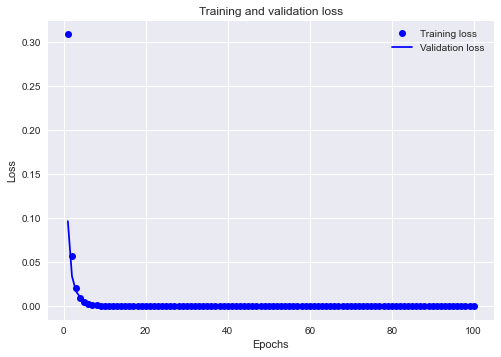

In [110]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

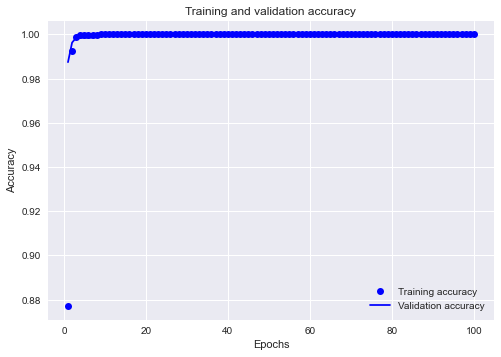

In [111]:
plt.clf()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')

plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [112]:
model = keras.models.load_model('Mushroom.h5')

In [113]:
predictions = model.predict(x_test_std)  
y_pred = np.where(predictions > 0.5, 1, 0)

confusion_matrix(y_test, y_pred)

array([[675,   0],
       [  0, 679]], dtype=int64)

In [114]:
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      edible       1.00      1.00      1.00       675
   poisonous       1.00      1.00      1.00       679

    accuracy                           1.00      1354
   macro avg       1.00      1.00      1.00      1354
weighted avg       1.00      1.00      1.00      1354



In [115]:
class_weights = class_weight.compute_class_weight(class_weight = 'balanced', 
                                                  classes = np.unique(y_train), 
                                                  y = y_train)
class_weights = dict(enumerate(class_weights))
class_weights

{0: 0.9552028218694886, 1: 1.049205734211546}

In [116]:
model = keras.Sequential([
    layers.Dense(500, kernel_initializer='lecun_normal',
                 activation='selu'),
#    layers.AlphaDropout(0.05),                      
    layers.Dense(1000, kernel_initializer='lecun_normal',
                 activation='selu'),
#    layers.AlphaDropout(0.05),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])


callbacks_list = [                                   
    keras.callbacks.EarlyStopping(                   
        monitor='val_loss',                          
        patience=5,                                        
    ),

    keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss', 
        factor=0.5,
        patience=2, 
        min_lr=0.0001
    ),

        keras.callbacks.ModelCheckpoint(                 
        filepath='Mushroom_Balance.h5',               
        monitor='val_loss',                          
        save_best_only=True,                         
    )
]


history = model.fit(x_train_std,
                    y_train,
                    epochs=1000,
                    callbacks=callbacks_list,
                    batch_size=512,
                    validation_data=(x_val_std, y_val),
                    class_weight=class_weights)

Epoch 1/1000
11/11 [==============================] - 1s 28ms/step - loss: 0.1404 - accuracy: 0.9365 - val_loss: 0.0094 - val_accuracy: 0.9985 - lr: 0.0010
Epoch 2/1000
11/11 [==============================] - 0s 20ms/step - loss: 0.0020 - accuracy: 0.9998 - val_loss: 0.0038 - val_accuracy: 0.9985 - lr: 0.0010
Epoch 3/1000
11/11 [==============================] - 0s 18ms/step - loss: 8.7149e-04 - accuracy: 0.9998 - val_loss: 0.0024 - val_accuracy: 0.9985 - lr: 0.0010
Epoch 4/1000
11/11 [==============================] - 0s 18ms/step - loss: 2.7418e-04 - accuracy: 1.0000 - val_loss: 8.1046e-04 - val_accuracy: 0.9993 - lr: 0.0010
Epoch 5/1000
11/11 [==============================] - 0s 18ms/step - loss: 1.2350e-04 - accuracy: 1.0000 - val_loss: 4.4447e-04 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 6/1000
11/11 [==============================] - 0s 16ms/step - loss: 7.1271e-05 - accuracy: 1.0000 - val_loss: 7.0409e-04 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 7/1000
11/11 [================

In [117]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy,lr
0,1.403840e-01,0.936485,9.403352e-03,0.998523,0.0010
1,2.046269e-03,0.999815,3.786620e-03,0.998523,0.0010
2,8.714905e-04,0.999815,2.413034e-03,0.998523,0.0010
3,2.741847e-04,1.000000,8.104610e-04,0.999261,0.0010
4,1.235002e-04,1.000000,4.444674e-04,1.000000,0.0010
...,...,...,...,...,...
888,9.035843e-10,1.000000,4.842920e-07,1.000000,0.0001
889,9.032592e-10,1.000000,4.843457e-07,1.000000,0.0001
890,9.029127e-10,1.000000,4.843775e-07,1.000000,0.0001
891,9.025266e-10,1.000000,4.843985e-07,1.000000,0.0001


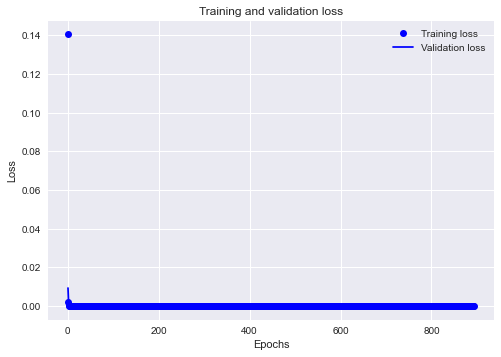

In [118]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.figsize = (10, 6)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

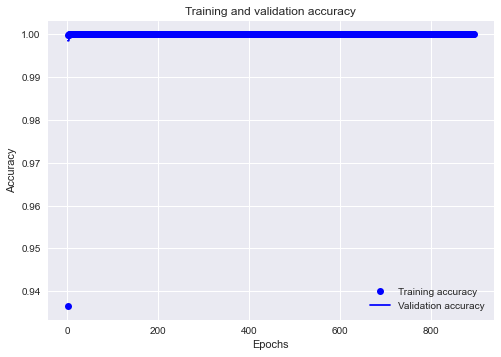

In [119]:
plt.clf()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')

plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [120]:
model = keras.models.load_model('Mushroom_Balance.h5')

In [121]:
predictions = model.predict(x_test_std)  
y_pred = np.where(predictions > 0.5, 1, 0)

confusion_matrix(y_test, y_pred)

array([[675,   0],
       [  0, 679]], dtype=int64)

In [122]:
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      edible       1.00      1.00      1.00       675
   poisonous       1.00      1.00      1.00       679

    accuracy                           1.00      1354
   macro avg       1.00      1.00      1.00      1354
weighted avg       1.00      1.00      1.00      1354

